# Wine quality

### Importing necessary stuff

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats
import numpy as np

### Get data into dataframe

In [2]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
wine = pd.read_csv(target_url, header = 0, sep = ";")

### First look at the data

In [3]:
summary = wine.describe()
print(wine.head())
print(summary)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### Quartiles boxplot

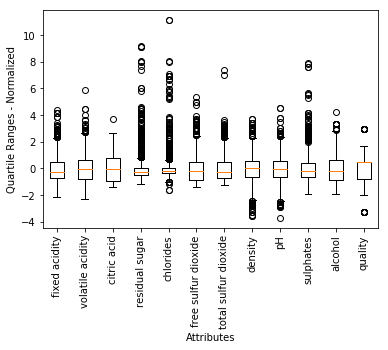

In [4]:
wineNormalized = wine.copy()
ncols = len(wineNormalized.columns)

for i in range(ncols):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    
    wineNormalized.iloc[:, i:(i + 1)] = (wineNormalized.iloc[:, i:(i + 1)] - mean) /sd
    
array = wineNormalized.values
plt.boxplot(array)
plt.xticks(list(range(1, len(summary.columns) + 1)), list(summary.columns), rotation = 'vertical')
plt.xlabel("Attributes")
plt.ylabel("Quartile Ranges - Normalized")
plt.show()

### Propability plots

Column 0:


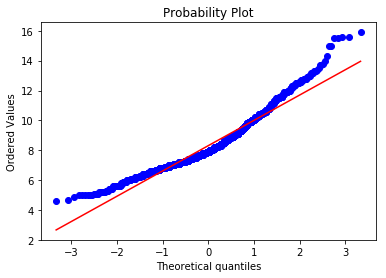

Column 1:


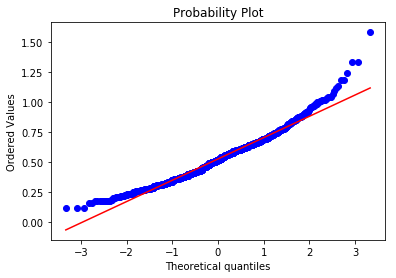

Column 2:


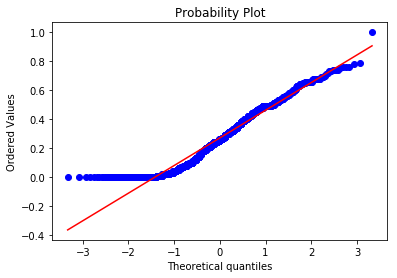

Column 3:


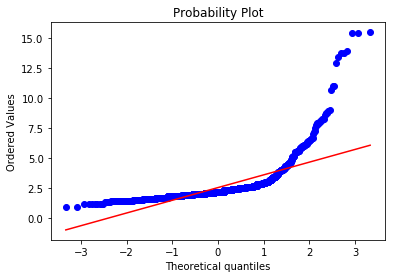

Column 4:


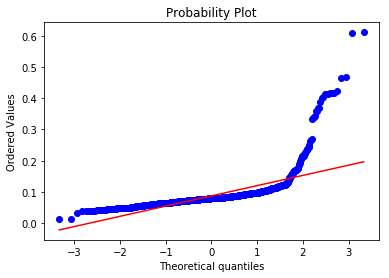

Column 5:


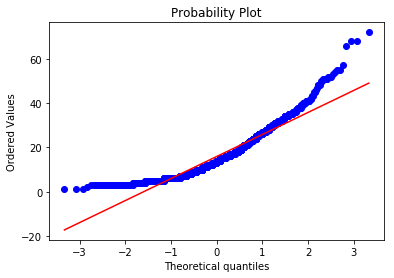

Column 6:


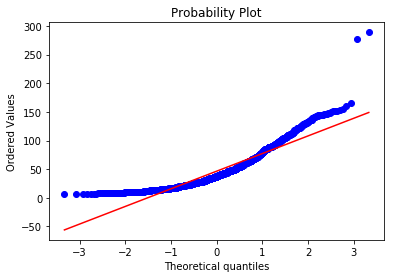

Column 7:


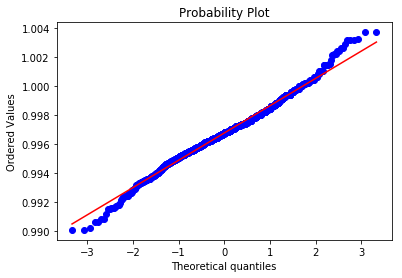

In [5]:
for col in range(len(summary)):
    stats.probplot(wine.iloc[:,col], dist = "norm", plot = plt)
    print("Column " + str(col) + ":")
    plt.show()

### Parallel coordinates plot (unnormalized vs normalized)

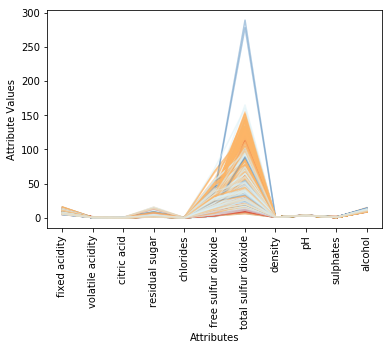

In [6]:
nrows = len(wine.index)
targetCol = len(summary.columns) - 1

meanTarget = summary.iloc[1, targetCol]
sdTarget = summary.iloc[2, targetCol]
nDataCol = len(wine.columns) - 1

for i in range(nrows):
    dataRow = wine.iloc[i, 0:nDataCol]
    normTarget = (wine.iloc[i, targetCol] - meanTarget) / sdTarget
    labelColor = 1.0 / (1.0 + math.exp(-normTarget))
    dataRow.plot(color = plt.cm.RdYlBu(labelColor), alpha = 0.5)
    
plt.xlabel("Attributes")
plt.ylabel("Attribute Values")
plt.xticks(list(range(0, len(summary.columns) - 1)), list(summary.columns)[:-1], rotation = 'vertical')
plt.show()

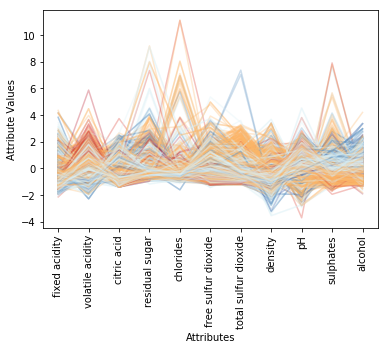

In [7]:
for i in range(nrows):
    dataRow = wineNormalized.iloc[i, 0:nDataCol]
    normTarget = wineNormalized.iloc[i, targetCol]
    labelColor = 1.0 / (1.0 + math.exp(-normTarget))
    dataRow.plot(color = plt.cm.RdYlBu(labelColor), alpha = 0.3)

plt.xlabel("Attributes")
plt.ylabel("Attribute Values")
plt.xticks(list(range(0, len(summary.columns) - 1)), list(summary.columns)[:-1], rotation = 'vertical')
plt.show()

### Correlation heat map

In [8]:
corMat = pd.DataFrame(wine.corr())
print(corMat)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

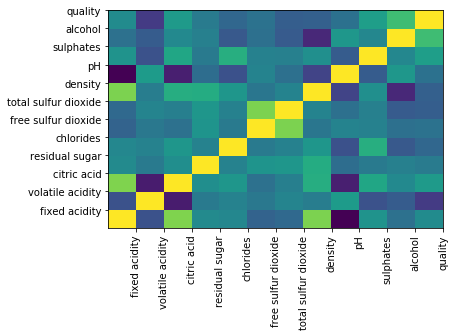

In [9]:
plt.pcolor(corMat)
plt.xticks(list(range(1, len(summary.columns) + 1)), list(summary.columns), rotation = 'vertical')
plt.yticks(list(range(1, len(summary.columns) + 1)), list(summary.columns), rotation = 'horizontal')
plt.show()

### Prepare data for linear regression

In [10]:
wineArray = np.array(wine)
np.random.shuffle(wineArray)
features = wineArray[:,0:-1]
labels = wineArray[:,-1]
print(features)
print(labels)

[[ 6.7    0.46   0.24  ...  3.39   0.6   10.6  ]
 [ 9.7    0.66   0.34  ...  3.26   0.66  10.1  ]
 [ 6.6    0.61   0.    ...  3.33   0.37  10.4  ]
 ...
 [ 7.     0.735  0.05  ...  3.39   0.57   9.8  ]
 [ 6.9    0.4    0.14  ...  3.43   0.63   9.7  ]
 [ 9.9    0.53   0.57  ...  3.19   0.76  11.6  ]]
[6. 5. 4. ... 5. 6. 7.]


### Lasso Regression

In [11]:
from sklearn import linear_model

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
model = linear_model.LassoCV(normalize = True, cv = 10).fit(features, labels)

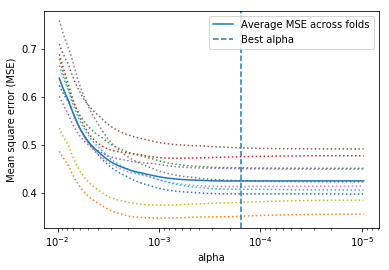

In [13]:
plt.plot(model.alphas_, model.mse_path_, ":")
plt.plot(model.alphas_, model.mse_path_.mean(axis=-1), label = "Average MSE across folds")
plt.axvline(model.alpha_, linestyle = "--", label = "Best alpha")
plt.legend()
plt.semilogx()
ax = plt.gca()
ax.invert_xaxis()
plt.axis("tight")
plt.ylabel("Mean square error (MSE)")
plt.xlabel("alpha")
plt.show()

In [14]:
model.coef_

array([ 0.        , -1.03152877, -0.02118748,  0.00324183, -1.78383121,
        0.00305065, -0.0028821 , -0.        , -0.41727939,  0.83870955,
        0.28644984])